In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

In [3]:
teta_deg = np.array([0, 30, 41, 62, 73, 90, 15], dtype = 'float')
teta_rad = teta_deg * math.pi / 180
cost = np.cos(teta_rad)
I = np.array([1.525, 1.240, 1.128, .752, .753, .657, 1.482], dtype = 'float')
I = I - .065
x_full = np.log(cost)
y_full = np.log(I / I[0])
x = np.delete(x_full, [0, 3, 4, 5])
y_helper = np.delete(y_full, [0, 3, 4, 5])
y = y_helper
#y[3] = y_helper[3] - y_full[5]
#y[4] = y_helper[4] - y_full[5]
teta_rad_cut = np.delete(teta_rad, [0, 3, 4, 5])
xerr = np.tan(teta_rad_cut) * 2 * 3.1415926535 / 180

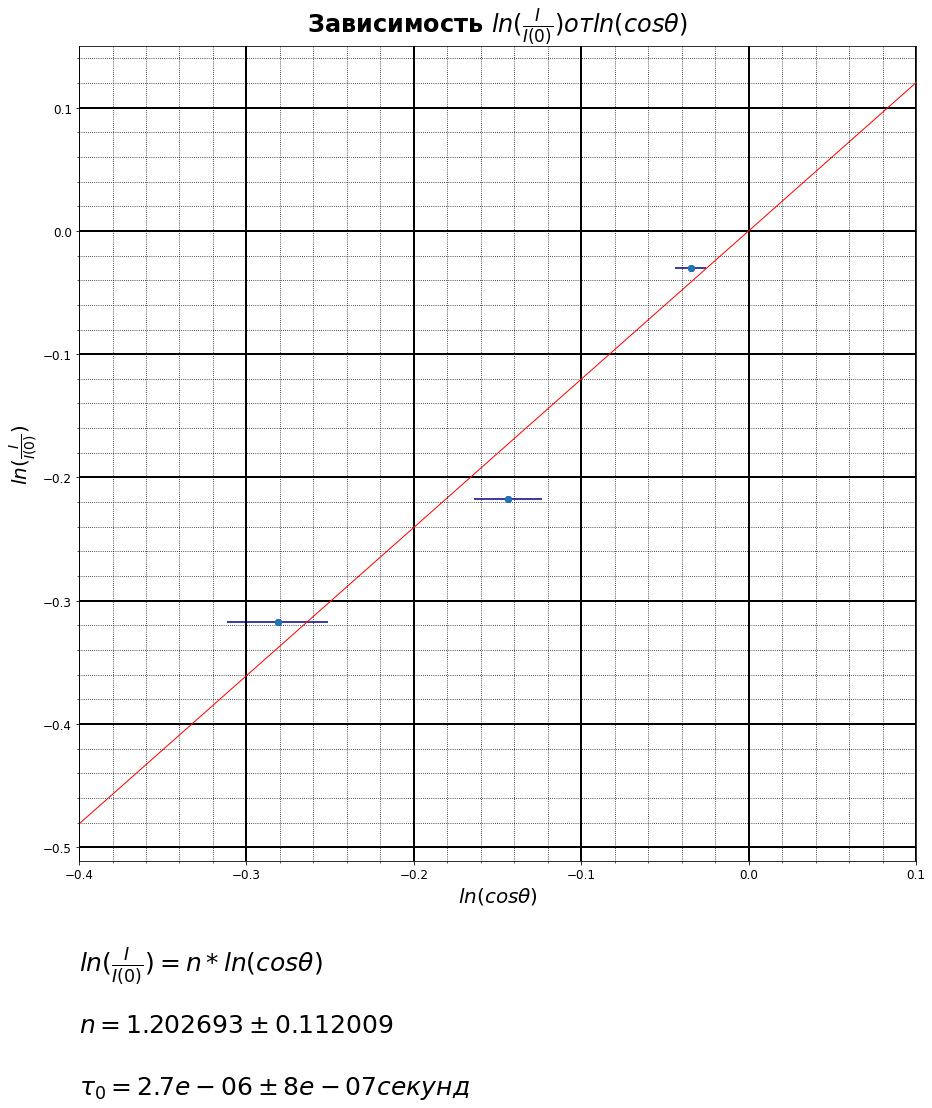

In [16]:
plt.plot(x, y, "bo")

model = sm.OLS(y, x)
res = model.fit()
param = res.params[::-1]
error = res.bse[::-1]
#straight_line = np.poly1d(params)
inter = np.linspace(-.4, .1, 5)
plt.plot(inter, param * inter, "r", linewidth = '1')

plt.title("Зависимость "r'$ln(\frac{I}{I(0)}) от ln(cos\theta)$', fontsize = 24, fontweight = 'bold')
ax = plt.gca()
ax.set_xlabel(r'$ln(cos\theta)$', fontsize = 20)
ax.set_ylabel(r'$ln(\frac{I}{I(0)})$', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.errorbar(x, y, xerr = xerr, yerr = 0, fmt='o', ecolor='navy')

ax.set_xlim(-.4, .1)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
fig = plt.gcf()
fig.set_size_inches(15, 15)

plt.text(-.4, -.60, r'$ln(\frac{I}{I(0)}) = n * ln(cos\theta)$', fontsize = 25)
plt.text(-.4, -.65, r'$n = %f \pm %g $' % (param, error), fontsize = 25)
plt.text(-.4, -.70, r'$\tau_0 = %.2g \pm %.1g секунд$' % (t0, G_t0), fontsize = 25)


plt.show()

In [12]:
L = 1500000 * (1 - 1 / math.cos(60 * math.pi / 180)) / ((param - 1.6) * math.log(math.cos(73 * math.pi / 180))) #in santims 1,2,6
gamma = 4 * 10 ** 3 / 105.8
beta = (1 - 1/gamma) ** .5
t0 = L / (beta * gamma * 2.9979 * 10 ** 10) #in seconds
G_t0 = t0 * error / (param - 1.6)
t0 =  -t0
print(t0, G_t0, G_t0/t0)

[2.74527146e-06] [7.73951823e-07] [0.28192178]
